In [1]:
#Importing necessary libraries.
import pandas as pd
import folium
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
%matplotlib inline

The purpose of this study is to provide the SRP with an updated account of the South King County, Washington Opportunity Youth. Opportunity Youth is defined as individuals aged between 16 and 25, not working and not enrolled in school. The previous report was published in 2016, and we will be looking to provide an update of 2017's incremental amount. We will be looking to answer the following questions for the SRP.

We will be looking to provide SRP with the following:


1) A map visualising the King County area and highlight the South King County area.

2) An updated estimate of total Opportunity Youth in the South King County area as of 2017.

3) An updated table from page 2 of the 2016 data brief.

4) A visualisation of a tend between 2016 and 2017


# Question 1:

A map that visualizes which parts of King County are a part of South King County

To begin with, we will need to idenitfy the cities which are part of South King County. Based on information from Google, we found out that the following cities are a part of South King County:

Auburn,Burien, Covington, Des Monies, Enumclaw, Federal Way, Kent, Maple Valley, Normandy Park,Renton, Tukwikla, SeaTac, White Center, Boulevard Park and Vashon.

We used the following SQL query to extract a table with the PUMA IDs from the puma_names_2010 table.

The SQL query we used to obtain this table is as follows:

```SQL
SELECT
    * 
FROM 
    puma_names_2010
WHERE 
    puma_name LIKE '%Auburn%'
    OR puma_name LIKE '%Federal Way%'
    OR puma_name LIKE '%Kent%'
    OR puma_name LIKE '%Renton%'
    OR puma_name LIKE '%Tukwila%'
    OR puma_name LIKE '%Highline%';
```

In [2]:
#Assigned the saved csv file as a dataframe to the variable pum_was
pum_was = pd.read_csv('puma_was.csv')

In [3]:
#Checking the head of the dataframe
pum_was.head()

,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
0,1,Alabama ...,14,1900,101900,G01001900,Lee County--Auburn City ...
1,1,Alabama ...,16,2300,102300,G01002300,"Coffee, Covington, Butler & Crenshaw Counties ..."
2,6,California ...,108,6103,606103,G06006103,Placer County (East/High Country Region)--Aubu...
3,10,Delaware ...,198,200,1000200,G10000200,Kent County--Dover City ...
4,17,Illinois ...,337,3531,1703531,G17003531,"Chicago City (South)--Auburn Gresham, Roseland..."


With the SQL query saved as a csv file, we loaded it into the Jupyter Notebook. We noticed that the SQL query gave a few cities outside Washington. In order to fix this, we filtered the dataframe using state_fips as 53, which is the id for Washinton. We then took the unique IDs in the 'puma' column of the table to identify the puma IDs for the cities we are interested in.

In [4]:
#Filtering out 'state_fips' column by 53
pum_was = pum_was[pum_was['state_fips'] == 53]

In [5]:
#Converting the unique puma IDs and casting that into a list
puma_names_list = list(pum_was['puma'].unique())
puma_names_list

[11610, 11613, 11614, 11615, 11611, 11612]

The list puma_names_list is the PUMA IDs in South King County that we are interested in

This next section will look at plotting the map of South King County. We will use geopandas and the file tl_2017_53.shp from the data folder to generate the map shape for King County. We will then use the South King County PUMA IDs to create a column SKC on the dataframe. Using values in the column SKC, we will be able to highlight the South King County cities.

In [6]:
#Allocating the the shp file to the variable fp
fp = "/Users/naweedahmed/Desktop/Flatiron_Feb/project_one_feb/opportunity_youth/data/raw/tl_2017_53_puma10/tl_2017_53_puma10.shp"

In [20]:
#Opening file KC_cities as a dataframe and assigning that to variable kc
kc = pd.read_csv('KC_cities.csv')

In [21]:
#Creating a variable map_df using the variable fp on geopandas
map_df = gpd.read_file(fp)

In [22]:
#Changing the type in columns PUMACE10 and GEOID10 to integers
map_df.loc[:,'PUMACE10'] = map_df['PUMACE10'].astype(int)
map_df.loc[:,'GEOID10'] = map_df['GEOID10'].astype(int)

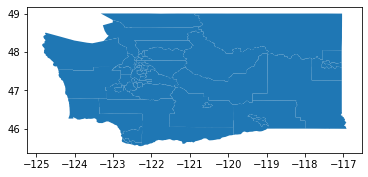

In [23]:
#plotting the map_df variable, we get the shape outline for the whole South King County.
map_df.plot()

Here we are extracting the unique PUMA IDs from the South King County area.

In [25]:
#Assigning this as a list to variable puma_list
puma_list = pum_was['puma'].unique()

In [27]:
#Taking the PUMA IDs between 11601 and 11616. These PUMA IDs identify the entire King Country Region
kc_puma = map_df.loc[(map_df.PUMACE10 >=11601) & (map_df.PUMACE10 <=11616) ]

In [28]:
#created an if statement to add 1 or 0 to column PUMACE10 based on the PUMA IDs. This will allow us to plot the South
#King County cities on the map shown above.
skc_puma = kc_puma.assign(SKC = [1 if row in puma_list else 0 for row in kc_puma['PUMACE10']])

In [29]:
#Checking head.
skc_puma.head()

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,SKC
9,53,11612,5311612,"King County (Far Southwest)--Federal Way, Des ...",G6120,S,160638807,279665546,+47.4764651,-122.4271168,"POLYGON ((-122.33587 47.26382, -122.33676 47.2...",1
32,53,11616,5311616,"King County (Northeast)--Snoqualmie City, Cott...",G6120,S,2477645989,49838932,+47.5779171,-121.6433869,"POLYGON ((-121.87736 47.50068, -121.87745 47.5...",0
35,53,11611,5311611,"King County (West Central)--Burien, SeaTac, Tu...",G6120,S,104685305,6835973,+47.4500687,-122.3101564,"POLYGON ((-122.26541 47.48933, -122.26516 47.4...",1
36,53,11605,5311605,Seattle City (West)--Duwamish & Beacon Hill PUMA,G6120,S,70104140,10124676,+47.5521279,-122.3523950,"POLYGON ((-122.32246 47.59583, -122.32147 47.5...",0
37,53,11603,5311603,Seattle City (Downtown)--Queen Anne & Magnolia...,G6120,S,29279826,8323991,+47.6391415,-122.3720415,"POLYGON ((-122.32238 47.65293, -122.32234 47.6...",0


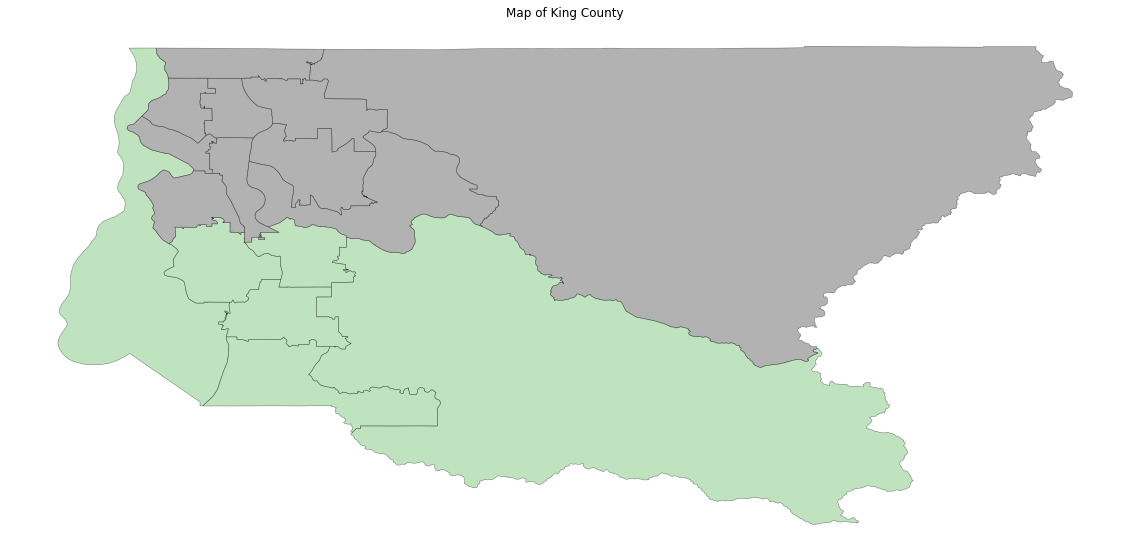

In [110]:
#Function for to plot the diagram
fig,ax = plt.subplots(1, figsize=(20,16))
ax= skc_puma.plot(ax=ax, column='SKC', cmap='Accent_r', alpha=0.5, linewidth=0.5, edgecolor='black', legend=False)
ax.set_title('Map of King County')
ax.set_axis_off()
fig.tight_layout`
plt.show();

The Green shaded cities represent the South King County cities.

# Question 2



An update of the estimated number of OY in South King County. In addition the estimate, be sure to include a breakdown of the count of OY by Public Use Microdata Area (PUMA) within South King County;

In order to answer question 2, we would need to run a SQL extract on the pums_2017 table to obtain all the data needed to answer the question.
We ran the following SQL query and saved the result under a Data Frame called was_rm

```SQL
SELECT 
* 
FROM pums_2017
WHERE puma ='11610'
OR puma ='11611'
OR puma ='11612'
OR puma ='11613'
OR puma ='11614'
OR puma ='11615'
```

In [31]:
#Opening the SQL query from the csv file using pandas and assigning it to the variable was_rm
was_rm = pd.read_csv('was_rm.csv')

In [32]:
#Checking the head.
was_rm.head()

,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
0,P,2013000888692,9,1,11611,4,53,1061971,26,58,...,26,44,46,24,25,47,7,25,8,24
1,P,2013000888957,9,1,11615,4,53,1061971,15,54,...,5,5,28,15,5,25,28,15,15,17
2,P,2013000888957,9,2,11615,4,53,1061971,18,27,...,5,5,31,20,5,36,30,15,17,20
3,P,2013000890399,9,1,11612,4,53,1061971,14,71,...,25,4,3,12,13,23,23,4,13,4
4,P,2013000890399,9,2,11612,4,53,1061971,13,59,...,29,3,4,16,14,18,17,2,15,4


In [33]:
#Checking the length of the table
len(was_rm)

34145

Opportunity Youth is defined by individuals aged between 16 and 24, not in school, or in employment. In order to determine this data set, we added a new column, 'Age_Group' and classified each individual into one of the following categories.

1) Ages between 16 and 18 : '16-18'

2) Ages between 19 and 21: '19-21'

3) Ages between 22 and 24: '22-24'

4) Ages below 16 and above 24: 'other'


In [34]:
#Assigning categorical data to a new column Age_Group based on age criterion

was_rm.loc[(was_rm['agep'] < 16),  'Age_Group'] = 'other'
was_rm.loc[(was_rm['agep'] >24),  'Age_Group'] = 'other'
was_rm.loc[((was_rm['agep'] >= 16) & (was_rm['agep'] <=18)) ,  'Age_Group'] = '16-18'
was_rm.loc[((was_rm['agep'] >= 19) & (was_rm['agep'] <=21)) ,  'Age_Group'] = '19-21'
was_rm.loc[((was_rm['agep'] >= 22) & (was_rm['agep'] <=24)) ,  'Age_Group'] = '22-24'

Following this, we further filtered the data based on their school and employment status.
We created a dataframe called 'was_rm_16_24' and filtered this according to ages above 16 and below 24. We will need to use this dataframe again later on.
In addition to this, we took the same dataframe, and filtered it down even further, taking the following columns:
'ESR' 1 and 3
'SCH' 1

In [35]:
#Creating a new data frame filtered on age between 16 and 24.
was_rm_16_24 = was_rm[(was_rm['agep']>= 16) & (was_rm['agep'] <=24)]
#Creating another data frame filtering out the OY population based on ESR as 3 or 6 and SCH as 1.
was_rm_OY = was_rm_16_24[((was_rm_16_24['esr']== 3) | (was_rm_16_24['esr'] == 6)) & (was_rm_16_24['sch'] == 1)]

Now that we have our Opportunity Youth data set, we can use the groupby and aggregrate pandas functions to see the counts based on the PUMA IDs

In [36]:
#Using groupbuy function and aggregate function to illustrate Count of individuals South King Country cities 
#based on their puma IDs.
was_rm_OY.groupby('puma').agg(Counts=('puma','count'))

,Counts
puma,
11610,50
11611,71
11612,58
11613,76
11614,82
11615,54


Total size of OY in South King County

In [37]:
len(was_rm_OY)

391

# Question 3:

    
An update of the table “Opportunity Youth Status by Age” located on page 2 of the 2016 report “Opportunity Youth in the Road Map Project Region”

In [ ]:
image goes here

 The table above is the "Opportunity Youth in the Road Map Project Region" from page 2 of the 2016 report.

In order to answer this question, we will use the dataframe 'was_rm_16_24' which already has the age of each individual classified under a column called 'Age_Group'.

We will look to create 2 tables representing the top half and bottom half of table above based on the 2017 incremental data.


Table 1 - Total Population:

In order to obtain the subsets we want, we will create a new column on the dataframe called 'Status'. This column is assigned based on the following conditions:

1) Opportunity Youth: ESR: 3 & 6, SCH: 1

2) Working Without Diploma: SCHL 1 to 15, ESR 1, 2, 4 and 5

3) Not an Opportunity Youth: ESR 1, 2, 4 and 5, SCH everthing except 1

In [43]:
#This will add categorical data to new column Series based on the columns on the table.
was_rm_16_24.loc[(((was_rm_16_24['esr']== 3) |(was_rm_16_24['esr'] ==6)) & (was_rm_16_24['sch'] == 1) ),'Status'] = 'Opportunity Youth'

//anaconda3/envs/oy-env/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda3/envs/oy-env/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [44]:
#This will add categorical data to new column Series based on the columns on the table.
was_rm_16_24.loc[((was_rm_16_24['esr']!= 3) & (was_rm_16_24['esr'] !=6) | (was_rm_16_24['sch'] !=1)),'Status']  = 'Not an Opportunity Youth'

In [45]:
#This will add categorical data to new column Series based on the columns on the table.
was_rm_16_24.loc[((was_rm_16_24['schl'] <=15)&((was_rm_16_24['esr']) <=2) | (was_rm_16_24['esr']==4) | (was_rm_16_24['esr']==5)),'Status'] = 'Working without diploma'

After running the classifications above, we can use groupby and aggregate methods to build the table we are looking for.

In [51]:
# Groupby and aggregate function.
was_table_1 = was_rm_16_24.groupby(['Status', 'Age_Group']).agg(Total=('Status','count'))
was_table_1

Total
Status                   Age_Group       
Not an Opportunity Youth 16-18       1066
                         19-21        816
                         22-24        894
Opportunity Youth        16-18         60
                         19-21        146
                         22-24        185
Working without diploma  16-18        187
                         19-21         61
                         22-24         67

In [52]:
#We used the unstack method to flatten the table
was_table_1.unstack()

Total            
Age_Group                16-18 19-21 22-24
Status                                    
Not an Opportunity Youth  1066   816   894
Opportunity Youth           60   146   185
Working without diploma    187    61    67



Table 2 - Opportunity Youth:

In order to build the bottom half of the table, we will create a new column on the dataframe called 'Edu_attain'. This is the education attainment of each individual in the dataset.
We will use the following:

1) No Diploma: SCHL 1 to 15

2) HS Diploma or GED: SCHL 16 and 17

3) Some College, no degree: SCHL 18 and 19

4) Degree (Associate or Higher): SCHL 20, 21, 22, 23 and 24

In [381]:
#We are assinging categorical data to a new column Edu_attain based on values in the schl column.
#Information in the schl columns represents each individuals educational attainment.
was_rm_OY.loc[((was_rm_OY['schl'] >= 1) & (was_rm_OY['schl'] <=15)) ,  'Edu_attain'] = 'No Diploma'
was_rm_OY.loc[((was_rm_OY['schl'] == 16) | (was_rm_OY['schl'] ==17)) ,  'Edu_attain'] = 'HS Diploma or GED'
was_rm_OY.loc[((was_rm_OY['schl'] == 18) | (was_rm_OY['schl'] ==19)) ,  'Edu_attain'] = 'Some College, no degree'
was_rm_OY.loc[((was_rm_OY['schl'] >= 20) & (was_rm_OY['schl'] <=24)) ,  'Edu_attain'] = 'Degree (Associate or Higher)'

In [100]:
#Using groupby and aggregate method to build the table we want
was_table_2 = was_rm_OY.groupby(['Edu_attain', 'Age_Group']).agg(Total=('Edu_attain','count'))

In [101]:
was_table_2

Total
Edu_attain                   Age_Group       
Degree (Associate or Higher) 19-21          4
                             22-24         17
HS Diploma or GED            16-18         19
                             19-21         79
                             22-24         83
No Diploma                   16-18         39
                             19-21         47
                             22-24         47
Some College, no degree      16-18          2
                             19-21         16
                             22-24         38

In [102]:
#using unstack method to flatten the table
was_table_2.unstack()

Total            
Age_Group                    16-18 19-21 22-24
Edu_attain                                    
Degree (Associate or Higher)   NaN   4.0  17.0
HS Diploma or GED             19.0  79.0  83.0
No Diploma                    39.0  47.0  47.0
Some College, no degree        2.0  16.0  38.0

Question 3

In [397]:
data_2016 = [['Not an opportunity Youth', 46661, 32318, 36426, 115405],
        ['Opportuntiy Youth',2805, 7284, 8728 , 18817],
        ['Working without Diploma', 587, 2049, 2877, 5513],
        ]

df_2016 = pd.DataFrame(data_2016, columns = ['Status', '16-18 (2016)', '19-21 (2016)', '22-24 (2016)', 'Total'])



In [398]:
df_2016

,Status,16-18 (2016),19-21 (2016),22-24 (2016),Total
0,Not an opportunity Youth,46661,32318,36426,115405
1,Opportuntiy Youth,2805,7284,8728,18817
2,Working without Diploma,587,2049,2877,5513


In [399]:
df_2016.set_index('Status')

,16-18 (2016),19-21 (2016),22-24 (2016),Total
Status,,,,
Not an opportunity Youth,46661,32318,36426,115405
Opportuntiy Youth,2805,7284,8728,18817
Working without Diploma,587,2049,2877,5513


In [401]:
was_table_1.unstack()

Total            
Age_Group                16-18 19-21 22-24
Status                                    
Not an Opportunity Youth  1066   816   894
Opportunity Youth           60   146   185
Working without diploma    187    61    67

In [63]:
67+2877

2944

In [70]:
delta_data = [['Not an Opportunity Youth', 46661, 47727, 32318, 33134, 36426, 37320], ['Opportunity Youth', 2805, 2865, 7284, 7430, 8728, 8913], [' Working without diploma', 587, 774, 2049, 2110, 2877, 2944]]
delta_data_df = pd.DataFrame( delta_data, columns = ['Category','16-18 (2016)', '16-18 (2017)', '19-21 (2016)', '19-21 (2017)', '22-24 (2016)', '22-24 (2017)'])

In [71]:

delta_data_df

,Category,16-18 (2016),16-18 (2017),19-21 (2016),19-21 (2017),22-24 (2016),22-24 (2017)
0,Not an Opportunity Youth,46661,47727,32318,33134,36426,37320
1,Opportunity Youth,2805,2865,7284,7430,8728,8913
2,Working without diploma,587,774,2049,2110,2877,2944


In [72]:
delta_data_df.columns


Index(['Category', '16-18 (2016)', '16-18 (2017)', '19-21 (2016)',
       '19-21 (2017)', '22-24 (2016)', '22-24 (2017)'],
      dtype='object')

In [74]:
delta_data_df['16-18 Delta%'] = ((delta_data_df ['16-18 (2017)'] - delta_data_df ['16-18 (2016)'])/ delta_data_df ['16-18 (2016)'] *100
delta_data_df['19-21 Delta%'] = (delta_data_df ['19-21 (2017)'] - delta_data_df ['19-21 (2016)']) / delta_data_df ['19-21 (2016)'] *100
delta_data_df['22-24 Delta%'] = (delta_data_df ['22-24 (2017)'] - delta_data_df ['22-24 (2016)']) / delta_data_df ['22-24 (2016)'] *100
delta_data_df

SyntaxError: invalid syntax (<ipython-input-74-dec7c8b8d57f>, line 2)

# Question 4

A visualization that highlights a trend between the 2016 report and current data.

We will create a Pie Chart illustrating the Race demographics in the Road Map region Opportunity Youth and show the trend between 2016 and 2017

Table 1: 2016 Numbers

We will first create a dataframe for the 2016 numbers based on table 3, page 2 of the 2016 report

In [84]:
#Creating a list of races.
OY_16_race = ['American Indian/Alaska Native','Native Hawaiian and Other Pacific Islander','Black/African American','Hispanic','Some Other Race alone','Two or More Races','White', 'Asian']
#Creating a list of values for each of the races.
OY_16_count = [387,439,2791,2008,1112,1534,8547,1999]
#Turning the 2 lists into a dictionary with keys 'Race' and 'Count'
pie_16 = {'Race':OY_16_race, 'Count':OY_16_count}
#Turning the dictionary into a dataframe
pie_16_df = pd.DataFrame(pie_16)
pie_16_df

,Race,Count
0,American Indian/Alaska Native,387
1,Native Hawaiian and Other Pacific Islander,439
2,Black/African American,2791
3,Hispanic,2008
4,Some Other Race alone,1112
5,Two or More Races,1534
6,White,8547
7,Asian,1999


Table 2: Incremental 2017 numbers

Now we will create another data frame showing the incremental numbers in 2017. We will use the was_rm_OY dataframe to do this. We will assign the values in the 'raclp' column the equivalent race as per the documentation.


White: 1

Black/African American: 2

American Indian/Alaska Native: 3, 4 and 5

Asian: 6

Native Hawaiian and Other Pacific Islander: 7

Some Other Race alone: 8

Two or More Races:9

In [85]:
was_rm_OY.head()

,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80,Age_Group,Edu_attain
138,P,2013000916904,9,4,11614,4,53,1061971,14,17,...,12,22,14,14,4,24,4,13,16-18,No Diploma
189,P,2013000926030,9,1,11613,4,53,1061971,5,22,...,8,1,1,5,5,11,5,5,22-24,HS Diploma or GED
242,P,2013000941965,9,3,11612,4,53,1061971,37,24,...,35,9,23,65,49,12,11,27,22-24,HS Diploma or GED
325,P,2013000950917,9,2,11613,4,53,1061971,17,24,...,5,6,14,17,16,16,35,5,22-24,"Some College, no degree"
357,P,2013000960556,9,3,11611,4,53,1061971,23,22,...,32,30,8,38,34,21,24,25,22-24,"Some College, no degree"


In [86]:
#Assigning the values in the'raclp' column based on the appropriate race as per the index.
was_rm_OY.loc[(was_rm_OY['rac1p']==7),'Race' ] = 'Native Hawaiian and Other Pacific Islander' 
was_rm_OY.loc[((was_rm_OY['rac1p']==3)| (was_rm_OY['rac1p']==4)|(was_rm_OY['rac1p']==5)) ,'Race' ] = 'American Indian/Alaska Native'
was_rm_OY.loc[(was_rm_OY['rac1p']==2),'Race' ] = 'Black/African American'
was_rm_OY.loc[(was_rm_OY['rac1p']==8),'Race' ] = 'Some Other Race alone'
was_rm_OY.loc[(was_rm_OY['rac1p']==9),'Race' ] = 'Two or More Races'
was_rm_OY.loc[(was_rm_OY['rac1p']==1),'Race' ] = 'White'
was_rm_OY.loc[(was_rm_OY['rac1p']==6),'Race' ] = 'Asian'

In [87]:
#Hispanic is not shown as a race under 'raclp'. We have used the 'hisp' column of the table to identify the Hispanic race.
was_rm_OY.loc[(was_rm_OY['hisp']!=1),'Race' ] = 'Hispanic'

In [88]:
#Doing a group by and aggregate function, using 'Race' as the column, and showing the count.
pie_17_df = was_rm_OY.groupby('Race').agg(Count=('Race','count'))

In [89]:
#resetting the index.
pie_17_df.reset_index()

,Race,Count
0,American Indian/Alaska Native,27
1,Asian,42
2,Black/African American,36
3,Hispanic,66
4,Native Hawaiian and Other Pacific Islander,10
5,Some Other Race alone,1
6,Two or More Races,27
7,White,182


Now that we have the 2 tables, we will merge them and then sum the 2 columns to show the 2017 total numbers

In [92]:
#merging the 2 dataframes together using the Race column
merged = pd.merge(pie_16_df, pie_17_df, on='Race')

In [93]:
#Renaming the columns to 2016 and 2017 incremental
merged.rename(columns={'Count_x':'2016', 'Count_y': '2017 incremental'}, inplace=True)

In [94]:
merged

,Race,2016,2017 incremental
0,American Indian/Alaska Native,387,27
1,Native Hawaiian and Other Pacific Islander,439,10
2,Black/African American,2791,36
3,Hispanic,2008,66
4,Some Other Race alone,1112,1
5,Two or More Races,1534,27
6,White,8547,182
7,Asian,1999,42


In [95]:
#Adding the values in the columns ' 2016' and '2017 incremental' to form a new column '2017 Total'
#We will use 2016 and 2017 Total to plot the Pie Charts
merged['2017 Total'] = merged['2016']+ merged['2017 incremental']

In [96]:
merged

,Race,2016,2017 incremental,2017 Total
0,American Indian/Alaska Native,387,27,414
1,Native Hawaiian and Other Pacific Islander,439,10,449
2,Black/African American,2791,36,2827
3,Hispanic,2008,66,2074
4,Some Other Race alone,1112,1,1113
5,Two or More Races,1534,27,1561
6,White,8547,182,8729
7,Asian,1999,42,2041


Here we will plot the Pie Charts

Pie Chart 1: Race as % of Population of Ordinary Youth 2016:

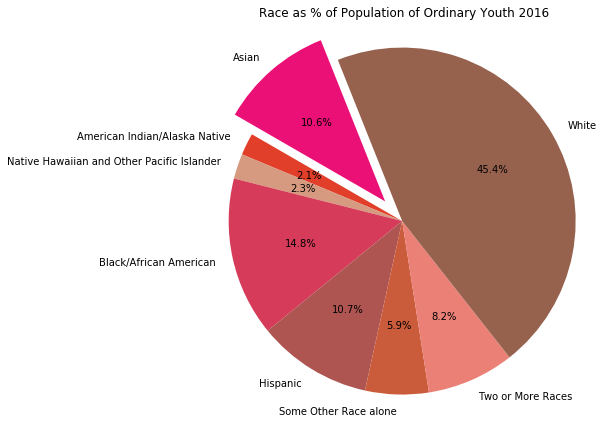

In [97]:
# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E","#EB1076"]
plt.figure(figsize=(8,6))
# Create a pie chart
plt.pie(
    # using data total)arrests
    merged['2016'],
    # with the labels being officer names
    labels=merged['Race'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0,0,0,0,0,0,0,0.15),
    # with the start angle at 90%
    startangle=150,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop abovea
plt.axis('equal')
plt.title('Race as % of Population of Ordinary Youth 2016')
# View the plot
plt.tight_layout()
plt.show()

Pie Chart 2: Race as % of Population of Ordinary Youth 2017:

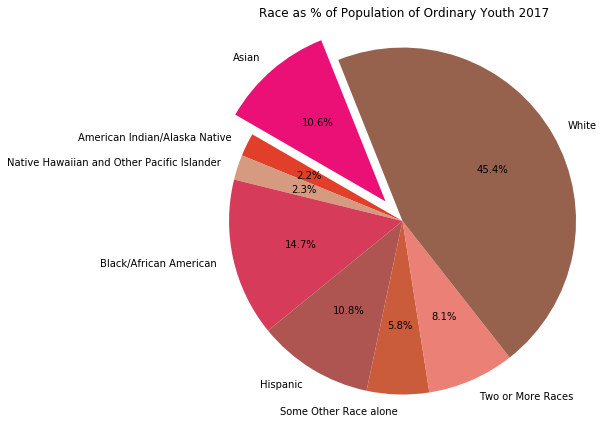

In [98]:
# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E","#EB1076"]
plt.figure(figsize=(8,6))
# Create a pie chart
plt.pie(
    # using data total)arrests
    merged['2017 Total'],
    # with the labels being officer names
    labels=merged['Race'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0,0,0,0,0,0,0,0.15),
    # with the start angle at 90%
    startangle=150,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop abovea
plt.axis('equal')
plt.title('Race as % of Population of Ordinary Youth 2017')
# View the plot
plt.tight_layout()
plt.show()